###  **Today's Agenda: Clustering with the Moons Dataset** 

1. **Dataset**: Use the `make_moons` dataset from `sklearn.datasets`.
2. **Steps**:
   - **Generate & Visualize**: Create the dataset and visualize it to understand the distribution.
   - **Train DBSCAN**: Train the DBSCAN model and experiment with `eps` (neighborhood radius) and `min_samples` (minimum points to form a cluster).
   - **Compare with K-Means**: Train a K-Means model and compare the clustering results with DBSCAN.
   - **Evaluation**:
     - Plot clusters from both algorithms.
     - Identify noise points using DBSCAN (points classified as noise).
3. **Key Goal**: Understand the advantages of DBSCAN in handling non-linear clusters and noise, compared to K-Means.

This concise workflow combines visualization, parameter tuning, and comparison of clustering techniques! 

In [51]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN,KMeans
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.metrics import silhouette_score,davies_bouldin_score,calinski_harabasz_score


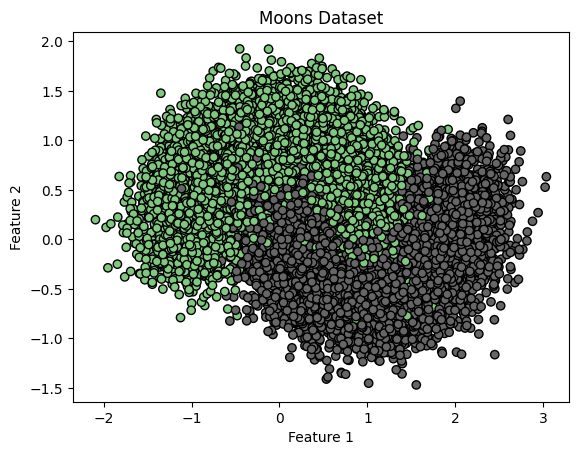

In [52]:
# creating a dataset
X,y  = make_moons(n_samples=20000,noise=.3,random_state=2)
plt.scatter(X[:,0],X[:,1],c = y,cmap='Accent',edgecolors='k',)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Moons Dataset")
plt.show()

In [53]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

[2 2 0 ... 2 2 0]


array([2, 0, 1], dtype=int32)

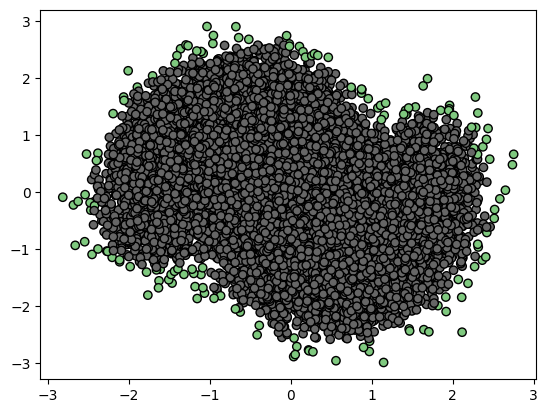

In [54]:
model = DBSCAN(eps=.175,min_samples=15)
model.fit(X)

db_scan_labels = model.labels_

plt.scatter(X[:,0],X[:,1],c = db_scan_labels,cmap='Accent',edgecolors="k")
print(labels)
l = pd.Series(labels)
l.unique()

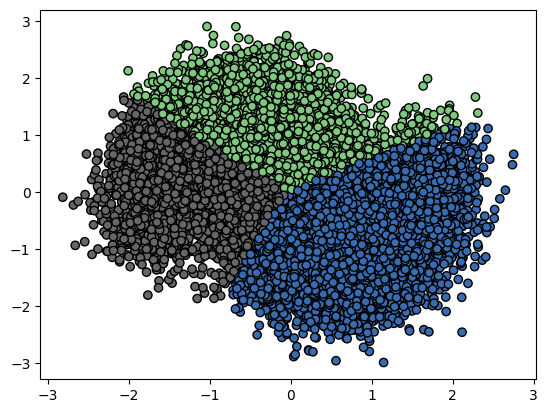

In [55]:
# training kmeans to compare with dbscan

k_model = KMeans(n_clusters=3,init = 'k-means++',random_state=2)
k_means_labels = k_model.fit_predict(X)
plt.scatter(X[:,0],X[:,1],c = k_means_labels,cmap='Accent',edgecolors='k')


In [56]:
# Metrics Evaluation

# Metrics for DBSCAN
db_scan_silhouette_score = silhouette_score(X,db_scan_labels)
db_scan_davies_bouldin_score = davies_bouldin_score(X,db_scan_labels)
db_scan_calinski_harabasz_score = calinski_harabasz_score(X,db_scan_labels)

#Metrics for Kmeans
k_means_silhouette_score = silhouette_score(X,k_means_labels)
k_means_davies_bouldin_score = davies_bouldin_score(X,k_means_labels)
k_means_calinski_harabasz_score = calinski_harabasz_score(X,k_means_labels)


print(f"DBScan Silhouette_score: {db_scan_silhouette_score:.2f}")
print(f"KMeans Silhouette_score: {k_means_silhouette_score:.2f}")
print('---------------------------------------------------------')
print(f"DBScan davies_bouldin_score :{db_scan_davies_bouldin_score:.2f}")
print(f"KMeans davies_bouldin_score: {k_means_davies_bouldin_score:.2f}")
print('---------------------------------------------------------')
print(f"DBScan calinski_harabasz_score: {db_scan_calinski_harabasz_score:.2f}")
print(f"KMeans calinski_harabasz_score: {k_means_calinski_harabasz_score:.2f}")


DBScan Silhouette_score: 0.34
KMeans Silhouette_score: 0.39
---------------------------------------------------------
DBScan davies_bouldin_score :93.93
KMeans davies_bouldin_score: 0.94
---------------------------------------------------------
DBScan calinski_harabasz_score: 0.12
KMeans calinski_harabasz_score: 17202.38
